# World Happines Report

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Load datasets from csv files

In [5]:
report=pd.read_csv('worldhappinessreport.csv')

### Data Exploration

In [6]:
report.head() # show first few record of dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
report.tail() # show last few record of dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
# checking out the number of records and columns in dataset
print(f'Size of Report :',report.shape)

Size of Report : (158, 12)


In [9]:
for column in report.columns:
    print(column)

Country
Region
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


In [10]:
report.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [108]:
report.isnull().sum() # checking the null value in every column

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Data Visualisation

In [11]:
# creating new dataframe for the sake of visualisation
vreport=report

In [12]:
import plotly.figure_factory as ff
z = pd.DataFrame(vreport.corr().values.tolist())
z = z.round(2).values.tolist()
fig = ff.create_annotated_heatmap(z, x = vreport.corr().columns.tolist(), y = vreport.corr().columns.tolist(), colorscale = 'Portland')
fig.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 1, 'x' : 0.5}, title_font_size = 25)
fig.show()

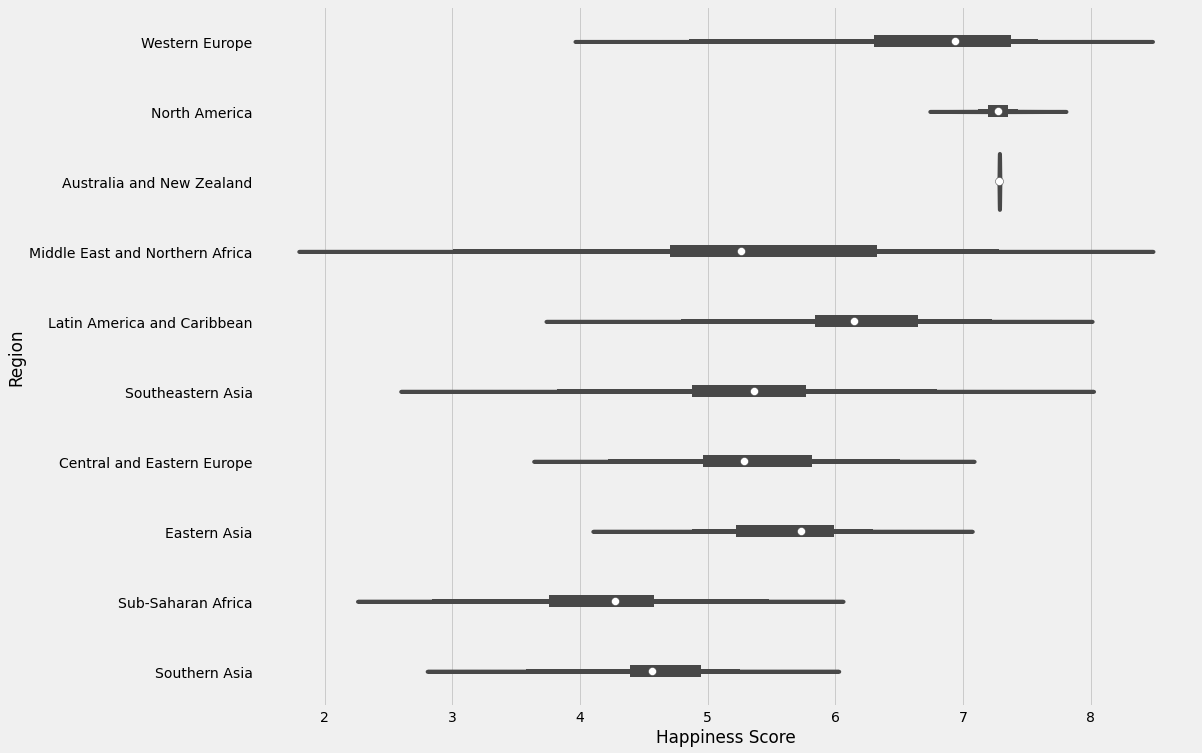

In [15]:
# happiness score vs continents

plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(vreport['Happiness Score'], vreport['Region'])
plt.show()

### Correlations for Western Europe

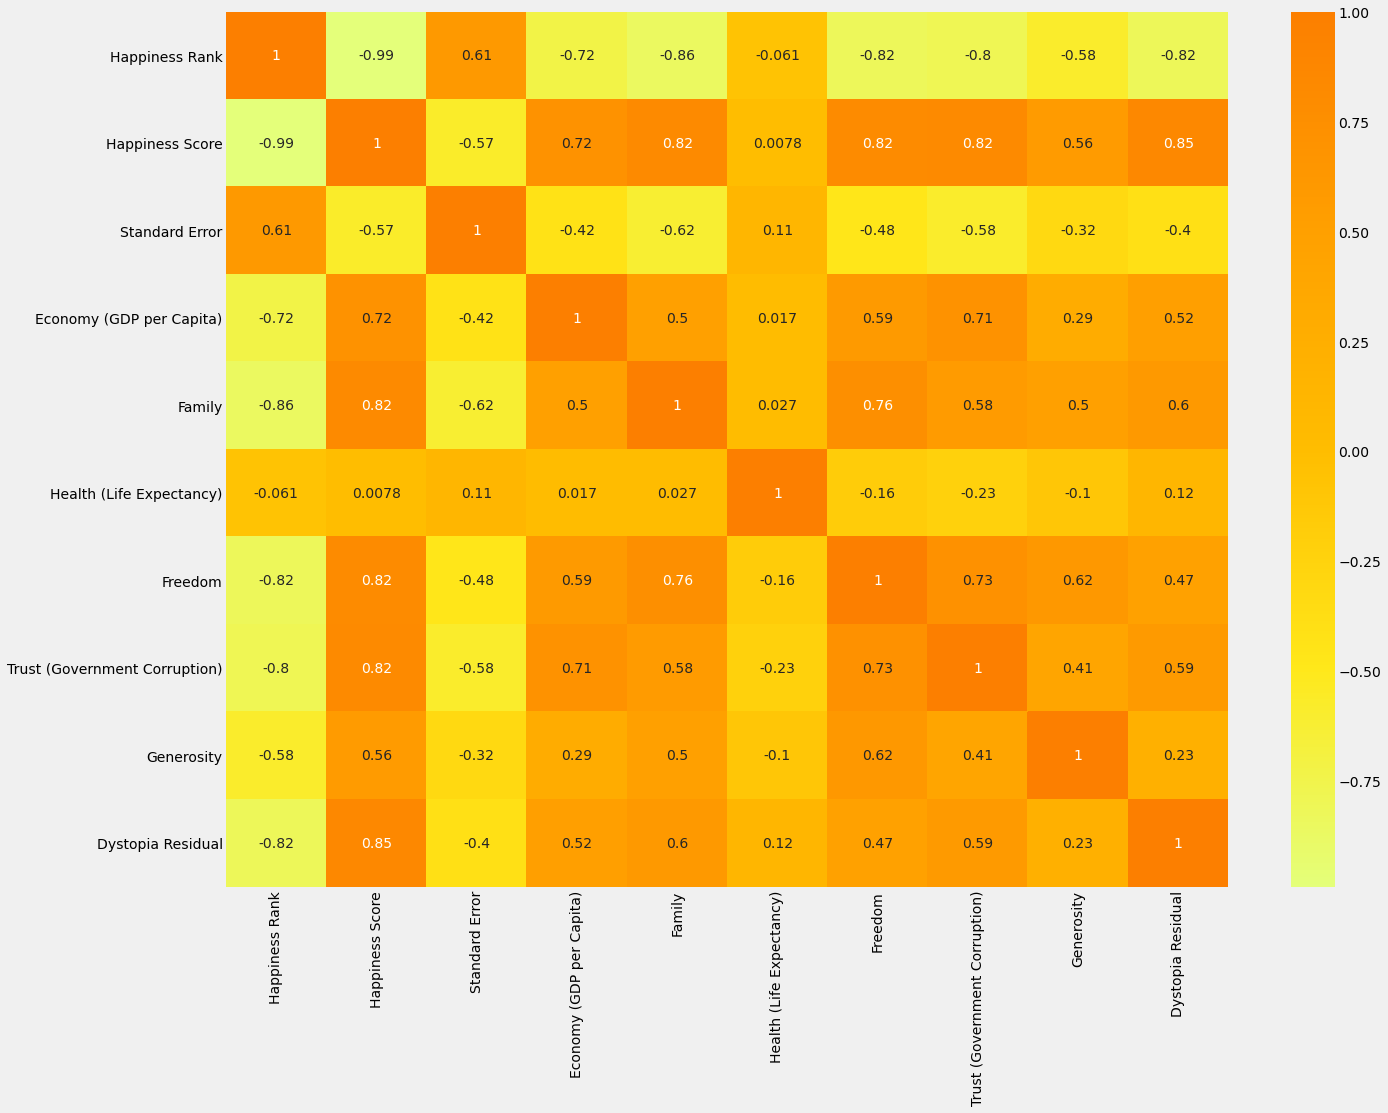

In [16]:
plt.rcParams['figure.figsize'] = (20, 15)

d = vreport.loc[lambda vreport: vreport['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Wistia', annot = True)

plt.show()

### Correlations for Eastern Asia

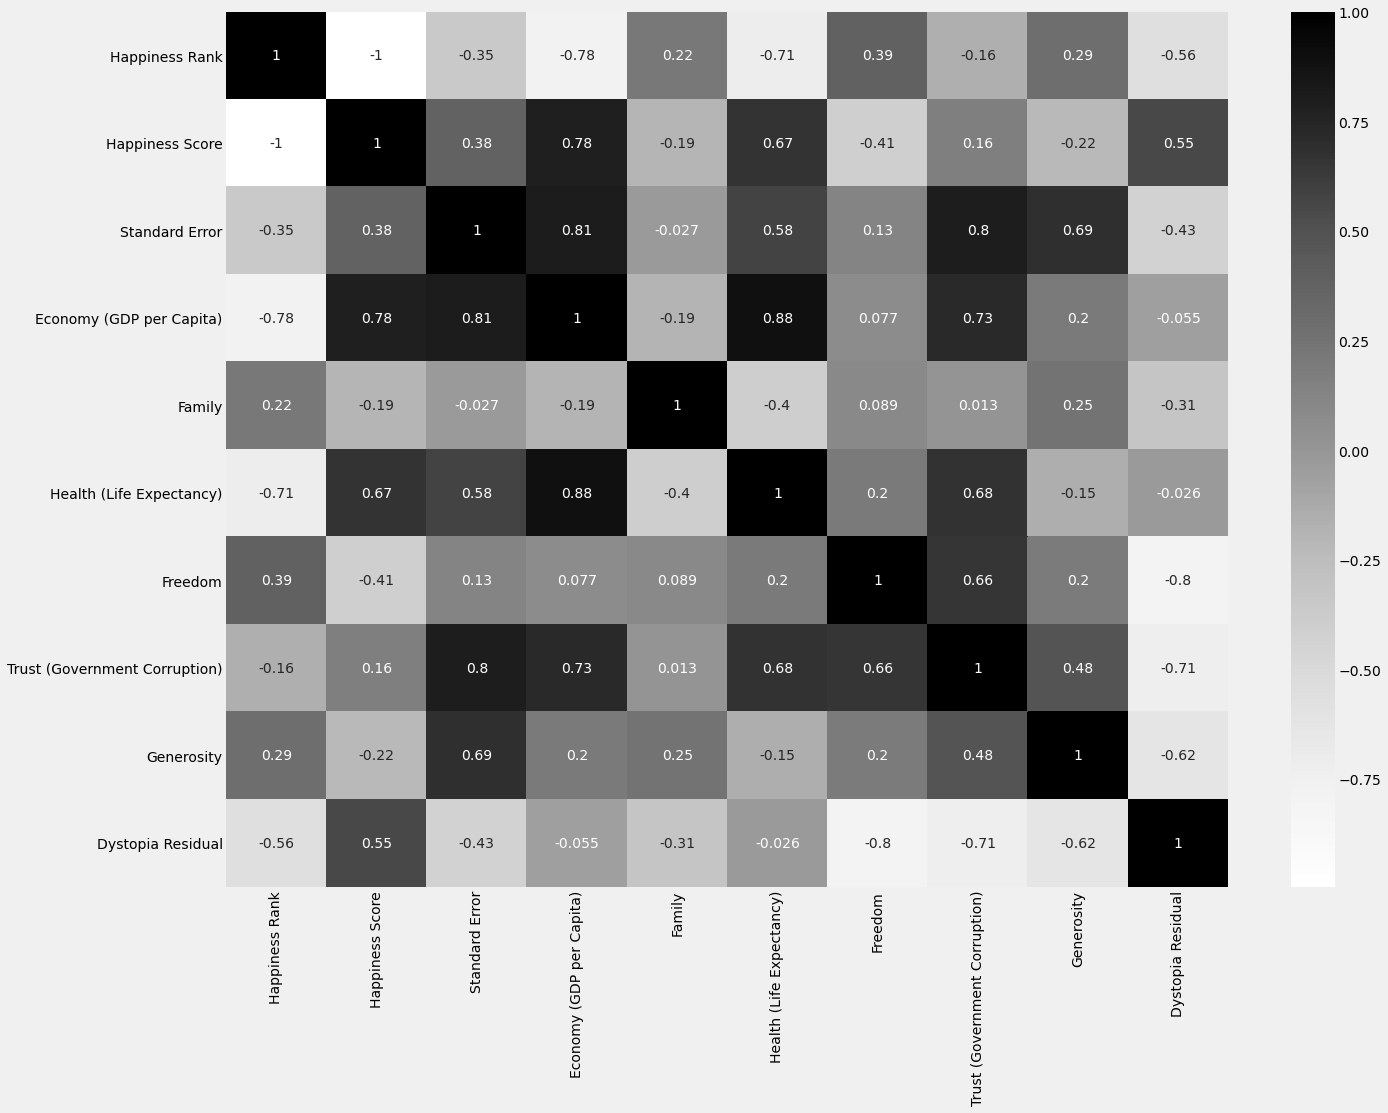

In [17]:
plt.rcParams['figure.figsize'] = (20, 15)

d = vreport.loc[lambda vreport: vreport['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()

### North America

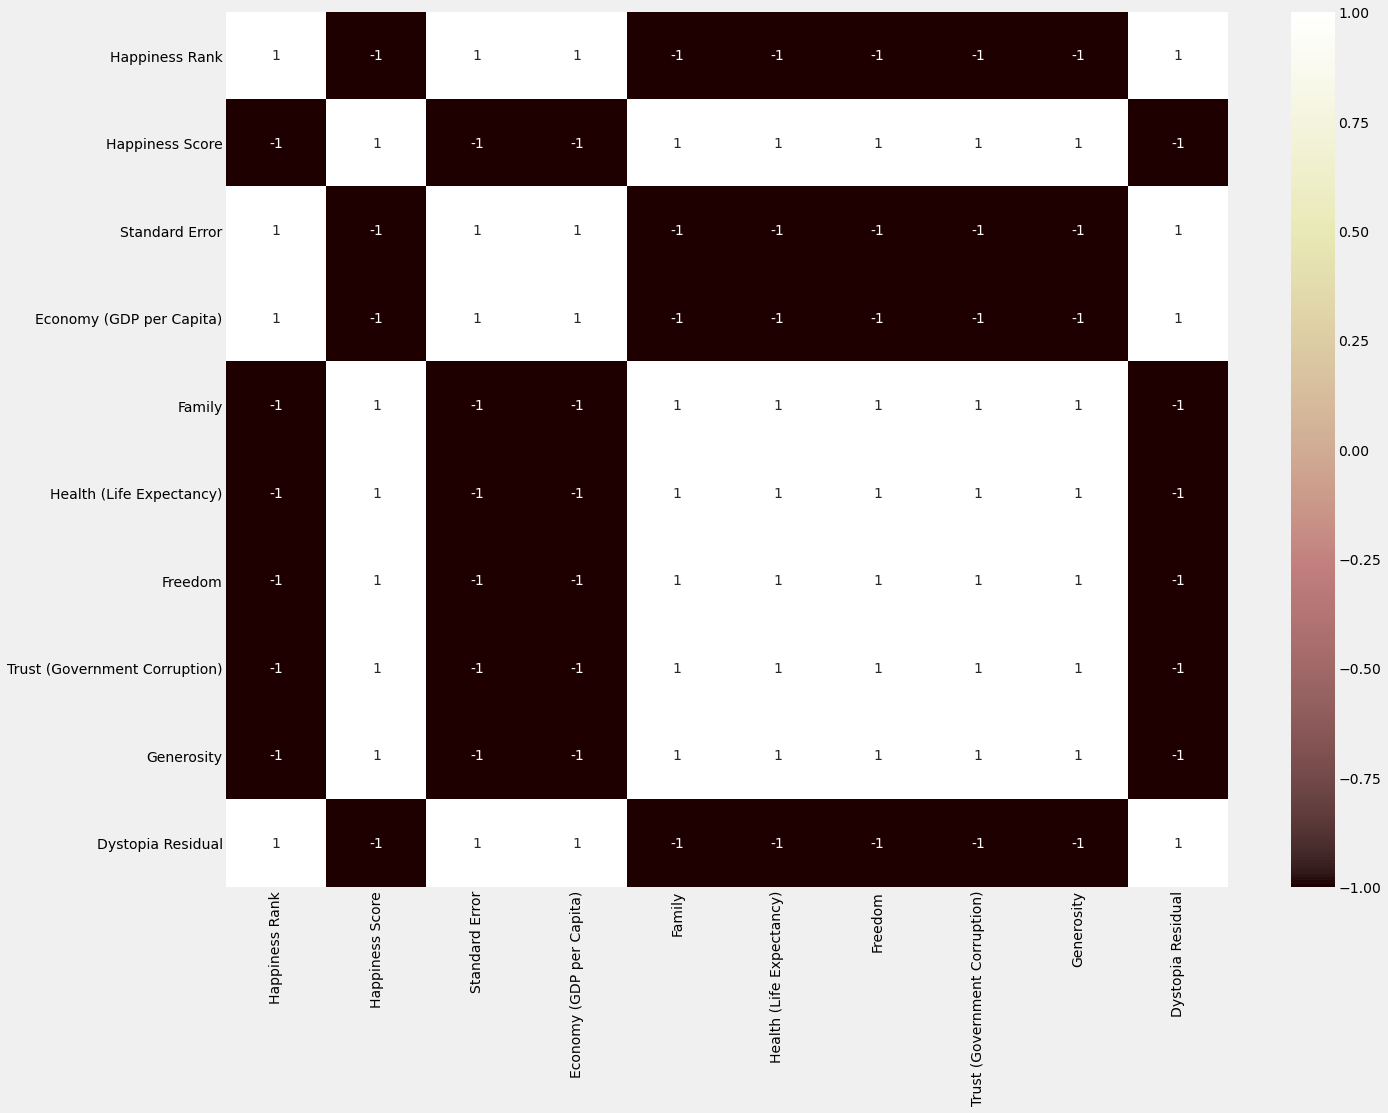

In [18]:
plt.rcParams['figure.figsize'] = (20, 15)

d = vreport.loc[lambda vreport: vreport['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'pink', annot = True)

plt.show()

### Middle East and Northern Africa

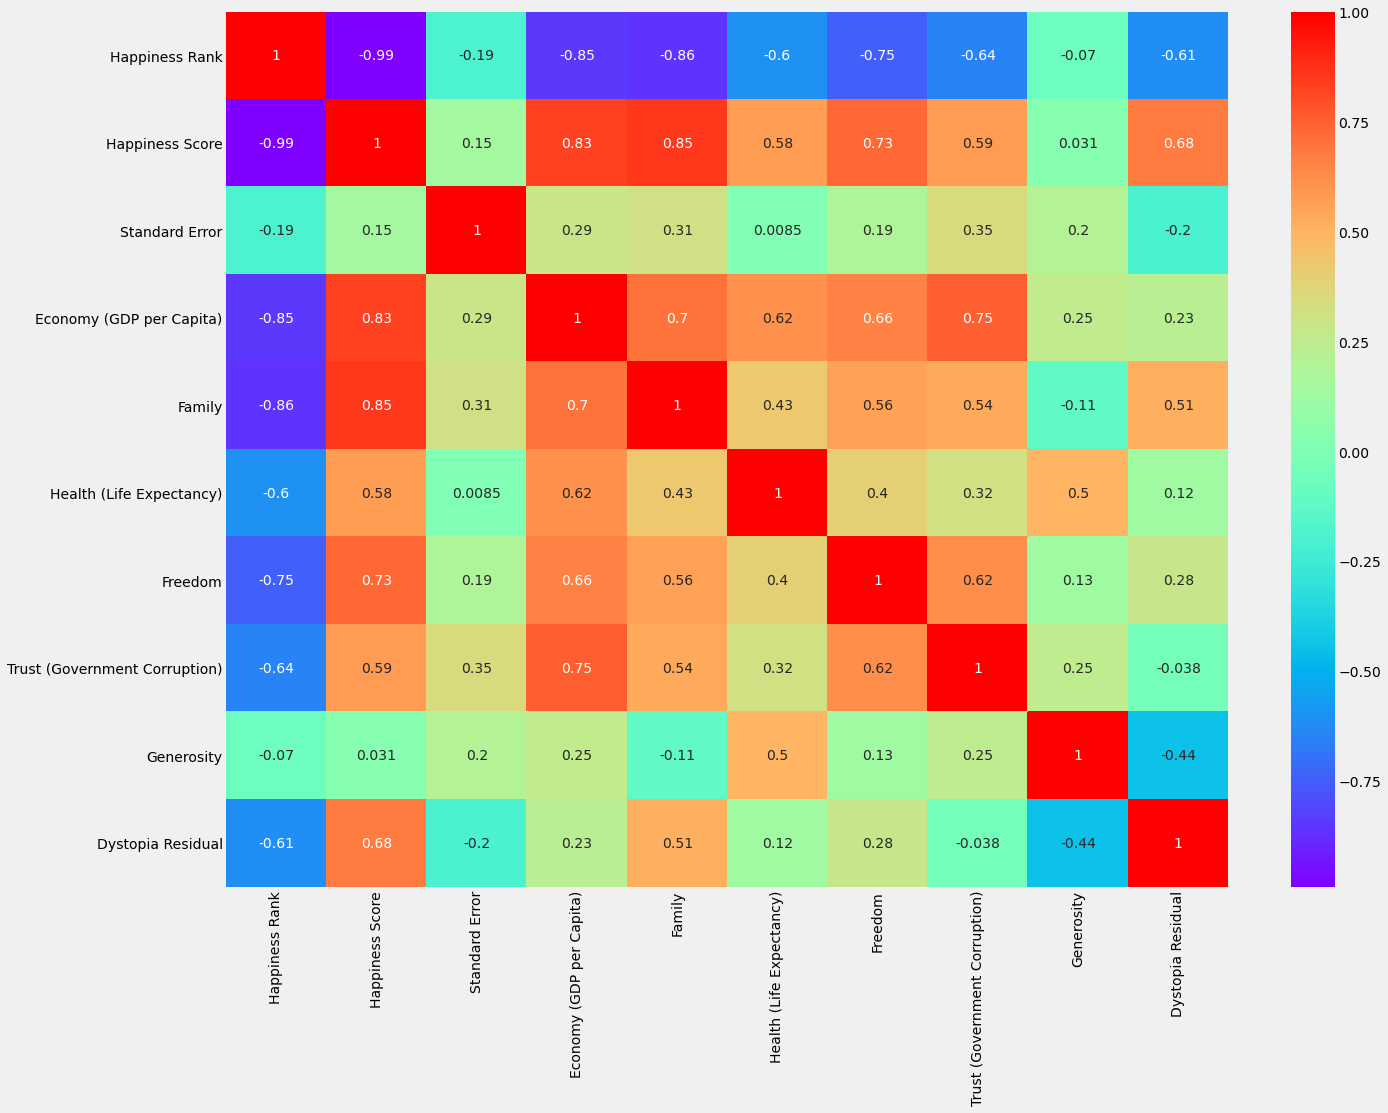

In [19]:
plt.rcParams['figure.figsize'] = (20, 15)

d = vreport.loc[lambda vreport: vreport['Region'] == 'Middle East and Northern Africa']

sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

### Sub-Saharan Africa

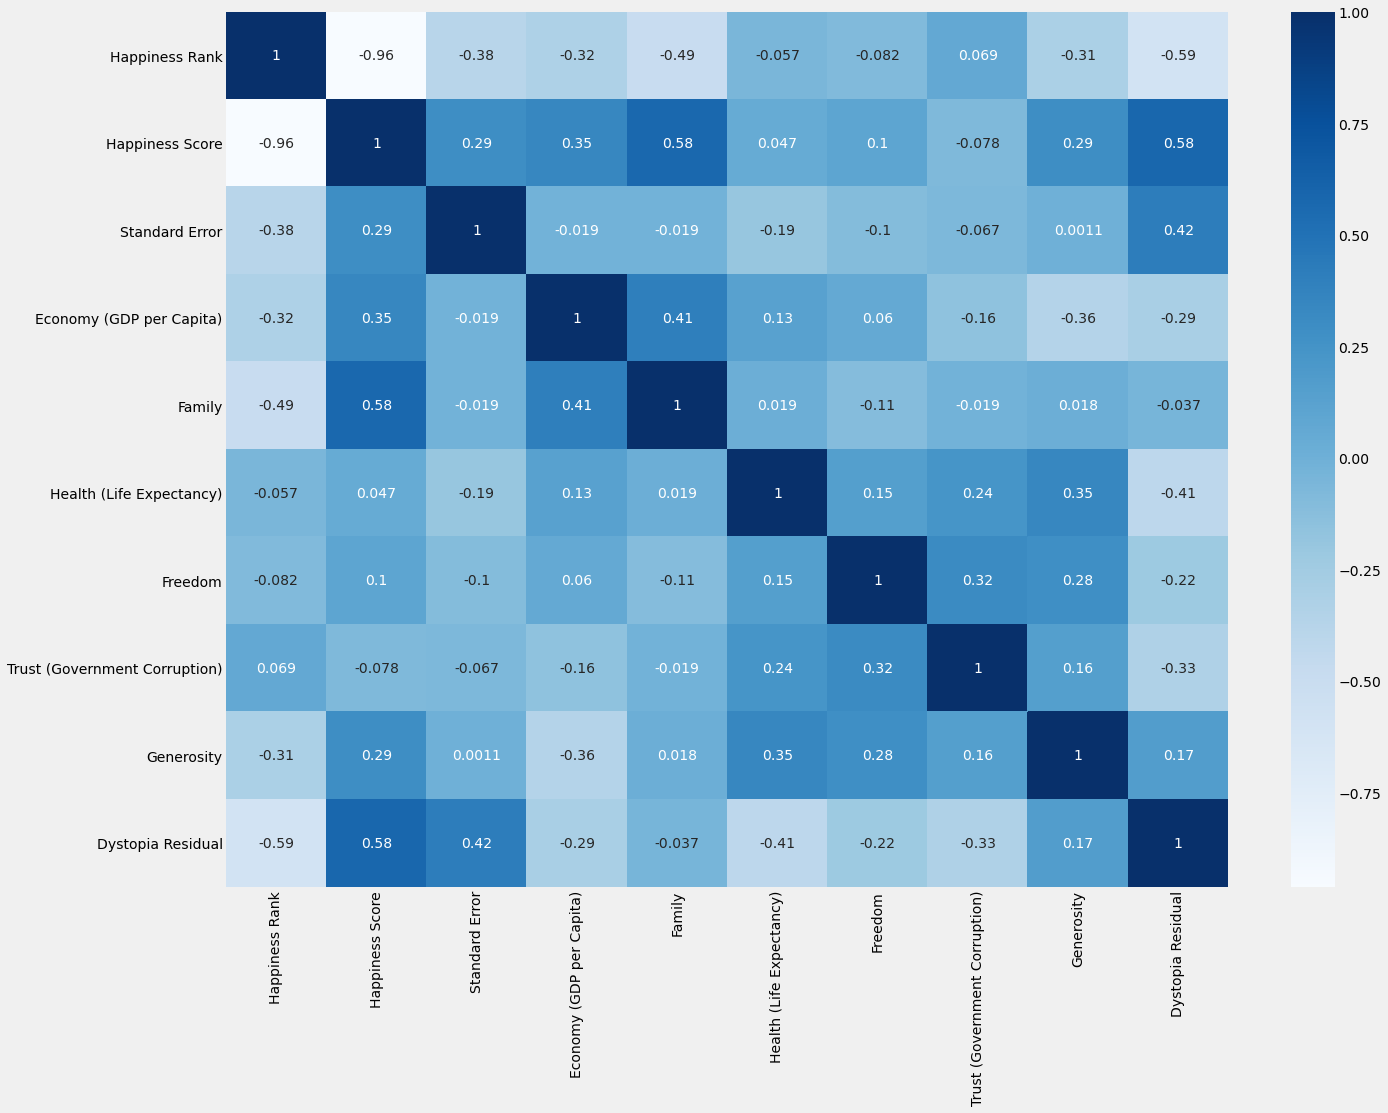

In [20]:
plt.rcParams['figure.figsize'] = (20, 15)

d = vreport.loc[lambda vreport: vreport['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

plt.show()

### Bubble Charts

In [21]:
figure = bubbleplot(dataset = vreport, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [22]:
figure = bubbleplot(dataset = vreport, x_column = 'Happiness Score', y_column = 'Trust (Government Corruption)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Happiness vs Trust vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [23]:
figure = bubbleplot(dataset = vreport, x_column = 'Happiness Score', y_column = 'Health (Life Expectancy)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [24]:
figure = bubbleplot(dataset = vreport, x_column = 'Happiness Score', y_column = 'Family', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Family", title = 'Happiness vs Family vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [25]:
import plotly.figure_factory as ff

data = (
  {"label": "Happiness", "sublabel":"score",
   "range": [5, 6, 8], "performance": [5.5, 6.5], "point": [7]},
  {"label": "Economy", "sublabel": "score", "range": [0, 1, 2],
   "performance": [1, 1.5], "sublabel":"score","point": [1.5]},
  {"label": "Family","sublabel":"score", "range": [0, 1, 2],
   "performance": [1, 1.5],"sublabel":"score", "point": [1.3]},
  {"label": "Freedom","sublabel":"score", "range": [0, 0.3, 0.6],
   "performance": [0.3, 0.4],"sublabel":"score", "point": [0.5]},
  {"label": "Trust", "sublabel":"score","range": [0, 0.2, 0.5],
   "performance": [0.3, 0.4], "point": [0.4]}
)



fig = ff.create_bullet(
    data, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='v',
)
py.iplot(fig, filename='bullet chart from dict')

## Generosity

In [29]:
trace1 = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = vreport['Country'],
               text = vreport['Country'], 
               z = vreport['Generosity'],
               )]

layout = dict(title = 'Generosity',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

### Top 10 Most Generous Countries

In [30]:
vreport[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
128,Myanmar,0.79588
33,Thailand,0.57630
20,United Kingdom,0.51912
36,Malta,0.51752
73,Indonesia,0.51535
90,Somaliland region,0.50318
78,Bhutan,0.47998
6,Netherlands,0.47610
8,New Zealand,0.47501
155,Syria,0.47179


## Trust in Governance

In [35]:
trace1 = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = vreport['Country'],
               text = vreport['Country'], 
               z = vreport['Trust (Government Corruption)'],
               )]

layout = dict(title = 'Trust in Governance',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


### Top 10 Countries with Trust in Government

In [38]:
vreport[['Country', 'Trust (Government Corruption)']].sort_values(by = 'Trust (Government Corruption)',
                                                                     ascending = False).head(10)

,Country,Trust (Government Corruption)
153,Rwanda,0.55191
27,Qatar,0.52208
23,Singapore,0.49210
2,Denmark,0.48357
7,Sweden,0.43844
8,New Zealand,0.42922
0,Switzerland,0.41978
5,Finland,0.41372
90,Somaliland region,0.39928
19,United Arab Emirates,0.38583


## Family Satisfaction

In [39]:
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = vreport['Country'],
               text = vreport['Country'], 
               z = vreport['Family'],
               )]

layout = dict(title = 'Family Satisfaction Index',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

### Top 10 Countries in Family Satisfaction

In [40]:
vreport[['Country', 'Family']].sort_values(by = 'Family', ascending = False).head(10)

,Country,Family
1,Iceland,1.40223
17,Ireland,1.36948
2,Denmark,1.36058
0,Switzerland,1.34951
43,Uzbekistan,1.34043
3,Norway,1.33095
4,Canada,1.32261
8,New Zealand,1.31967
5,Finland,1.31826
35,Spain,1.31379


## GDP

In [42]:
trace1 = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = vreport['Country'],
               text = vreport['Country'], 
               z = vreport['Economy (GDP per Capita)'],
               )]

layout = dict(title = 'GDP',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)


### Top 10 Countries with Best Economy

In [45]:
vreport[['Country', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',
            ascending = False).head(10)

,Country,Economy (GDP per Capita)
27,Qatar,1.69042
16,Luxembourg,1.56391
38,Kuwait,1.55422
23,Singapore,1.52186
3,Norway,1.45900
19,United Arab Emirates,1.42727
0,Switzerland,1.39651
34,Saudi Arabia,1.39541
14,United States,1.39451
71,Hong Kong,1.38604


## Freedom Index

In [47]:
trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = vreport['Country'],
               text = vreport['Country'], 
               z =vreport['Freedom'],
               )]

layout = dict(title = 'Freedom Index',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

### Top 10 Most Freedom Oriented Countries

In [49]:
vreport[['Country', 'Freedom']].sort_values(by = 'Freedom', ascending = False).head(10)

,Country,Freedom
3,Norway,0.66973
0,Switzerland,0.66557
144,Cambodia,0.66246
7,Sweden,0.65980
43,Uzbekistan,0.65821
9,Australia,0.65124
2,Denmark,0.64938
5,Finland,0.64169
19,United Arab Emirates,0.64157
27,Qatar,0.64040


## Happiness Rank

In [50]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = vreport['Country'],
               text = vreport['Country'], 
               z = vreport['Happiness Rank'],
               )]

layout = dict(title = 'Happiness Rank',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]

annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

### Top 10 Happiest Countries

In [53]:
vreport[['Country','Happiness Rank']].head(10)

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
5,Finland,6
6,Netherlands,7
7,Sweden,8
8,New Zealand,9
9,Australia,10


### Model Building

In [69]:
# divide dataset in to features and label
X=vreport.drop(columns=['Happiness Score'])
y=vreport['Happiness Score']

In [70]:
# data scaling
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [72]:
# let's split into the two subsets using random selection

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.3,random_state=42)

### Predicting the Happiness Score using Linear Regression

In [91]:
# model initiating and training
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
yprd=lr.predict(X_train)
yprd

array([3.90371294, 7.22576532, 5.21207111, 5.58867707, 4.43552218,
       6.61131588, 5.12315776, 4.33210049, 6.13018069, 7.42696409,
       6.47682796, 5.77042056, 3.58687124, 5.68866483, 6.94616995,
       4.41926257, 7.27771277, 4.69396709, 4.78797584, 7.58683773,
       4.60960898, 5.70880947, 5.99514466, 5.19238748, 6.57500685,
       6.16766596, 3.81926914, 6.75012096, 6.79775112, 4.67730621,
       6.26922796, 5.12420489, 4.85744356, 3.46490258, 4.25198826,
       5.97527889, 4.57128628, 5.7586481 , 5.39875496, 6.45466943,
       4.7865106 , 4.6422353 , 4.51702453, 5.75438434, 4.9594561 ,
       4.88457589, 5.85530368, 7.40600664, 4.68079317, 4.51786814,
       5.94810441, 6.32883716, 5.19367743, 5.26791241, 6.41114844,
       5.98377051, 7.3635871 , 6.00283022, 5.47697641, 3.67775722,
       5.0130953 , 5.14051904, 3.8964616 , 3.84496078, 5.07328275,
       7.28616259, 4.63341879, 7.18730503, 5.79068066, 4.0767313 ,
       7.5221252 , 6.94021409, 6.29483025, 5.42868545, 3.98877

In [85]:
# let's check score
lr.score(X_train,y_train)

0.9999999426927577

### Model Evaluation 

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
ypred=lr.predict(X_test)

In [88]:
mean_squared_error(y_test,ypred)

7.772191109224778e-08

In [89]:
np.sqrt(mean_squared_error(y_test,ypred))

0.0002787864973277002